In [65]:
%matplotlib inline
import geopandas as gpd
import requests, pandas as pd
from shapely.geometry import Point

In [25]:
geo_df = gpd.read_file("data/cb_2015_us_state_20m.shp")

In [30]:
geo_df.set_index(geo_df["NAME"].astype(str), inplace = True)
geo_df.head(60)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,,
Texas,0400000US48,676634395761,19027462392,48,00,Texas,48,01779801,TX,"POLYGON ((-106.623445 31.914034, -106.630114 3..."
California,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA,"(POLYGON ((-118.593969 33.467198, -118.484785 ..."
Kentucky,0400000US21,102266253024,2389483091,21,00,Kentucky,21,01779786,KY,"POLYGON ((-89.544434 36.57451, -89.47934599999..."
Georgia,0400000US13,149169759045,4740824950,13,00,Georgia,13,01705317,GA,"POLYGON ((-85.605165 34.984678, -85.4743388431..."
Wisconsin,0400000US55,140269484183,29365442607,55,00,Wisconsin,55,01779806,WI,"(POLYGON ((-86.934276 45.421149, -86.835748999..."
Oregon,0400000US41,248608778890,6190771822,41,00,Oregon,41,01155107,OR,"POLYGON ((-124.552441 42.840568, -124.480938 4..."
Virginia,0400000US51,102282988386,8503553482,51,00,Virginia,51,01779803,VA,"(POLYGON ((-76.02347499999999 37.289067, -75.9..."
Tennessee,0400000US47,106800181941,2352826875,47,00,Tennessee,47,01325873,TN,"POLYGON ((-90.300697 35.028793, -90.2652959999..."
Louisiana,0400000US22,111903220951,23747902252,22,00,Louisiana,22,01629543,LA,"POLYGON ((-94.04305152761759 32.6930299766656,..."


In [84]:
cities_df = pd.read_csv("data/Locations.csv")
cities_df.set_index(cities_df["NAME"].astype(str), inplace = True)
cities_df.head()

,NAME,Longitude,Latitude,Vote
NAME,,,,
Alabama,Alabama,-86.300942,32.377447,1
Alaska,Alaska,-134.410467,58.302197,1
Arizona,Arizona,-112.097094,33.448097,1
Arkansas,Arkansas,-92.288761,34.746758,1
California,California,-121.493411,38.576572,2


In [88]:
geometry = [Point(xy) for xy in zip(cities_df.Longitude, cities_df.Latitude)]
cities_coords_df = gpd.GeoDataFrame(cities_df, crs = geo_df.crs, geometry=geometry)
cities_coords_df.head()

,NAME,Longitude,Latitude,Vote,geometry
NAME,,,,,
Alabama,Alabama,-86.300942,32.377447,1,POINT (-86.30094200000001 32.377447)
Alaska,Alaska,-134.410467,58.302197,1,POINT (-134.410467 58.302197)
Arizona,Arizona,-112.097094,33.448097,1,POINT (-112.097094 33.448097)
Arkansas,Arkansas,-92.288761,34.746758,1,POINT (-92.28876099999999 34.746758)
California,California,-121.493411,38.576572,2,POINT (-121.493411 38.576572)


In [31]:
contiguous =  (geo_df.index != "Puerto Rico")
contiguous &= (geo_df.index != "Hawaii")
contiguous &= (geo_df.index != "Alaska")
geo_df = geo_df[contiguous]

{'init': 'epsg:4269'}


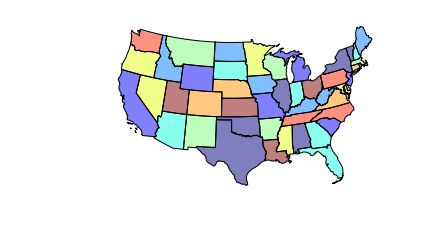

In [33]:
print(geo_df.crs)
ax = geo_df.to_crs(epsg=2163).plot()
ax.set_axis_off()

In [42]:
import pandas as pd, geopandas as gpd

newstrump_df = pd.read_csv("trump_tweets.csv", index_col = "NAME")
newstrump_df.head()


,NEWSPAPER,TWITTER_USER,11/22/16,11/23/16,11/24/16,11/25/16,11/26/16,TOTAL_TRUMP
NAME,,,,,,,,
Alabama,The Dothan Eagle,dothaneagle,1,0,0,0,0,1
Arizona,Arizona Daily Star,TucsonStar,1,0,0,1,3,5
Arkansas,Southwest Times Record,TimesRecord,1,3,0,1,0,5
California,San Francisco Chronicle,sfchronicle,23,24,9,6,12,74
Colorado,The Gazette,csgazette,7,3,3,8,3,24


In [46]:
geo_mergeT = geo_df.join(newstrump_df, how = "inner")
geo_mergeT.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,NEWSPAPER,TWITTER_USER,11/22/16,11/23/16,11/24/16,11/25/16,11/26/16,TOTAL_TRUMP
NAME,,,,,,,,,,,,,,,,,,
Alabama,0400000US01,131173369432,4593984687,01,00,Alabama,01,01779775,AL,"POLYGON ((-88.46866248405129 31.8938557116156,...",The Dothan Eagle,dothaneagle,1,0,0,0,0,1
Arizona,0400000US04,294204474990,1027559124,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona Daily Star,TucsonStar,1,0,0,1,3,5
Arkansas,0400000US05,134769279101,2962525273,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.617919 36.499414, -94.3612029999...",Southwest Times Record,TimesRecord,1,3,0,1,0,5
California,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA,"(POLYGON ((-118.593969 33.467198, -118.484785 ...",San Francisco Chronicle,sfchronicle,23,24,9,6,12,74
Colorado,0400000US08,268428431772,1175462574,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.059962 38.499987, -109.05996197...",The Gazette,csgazette,7,3,3,8,3,24


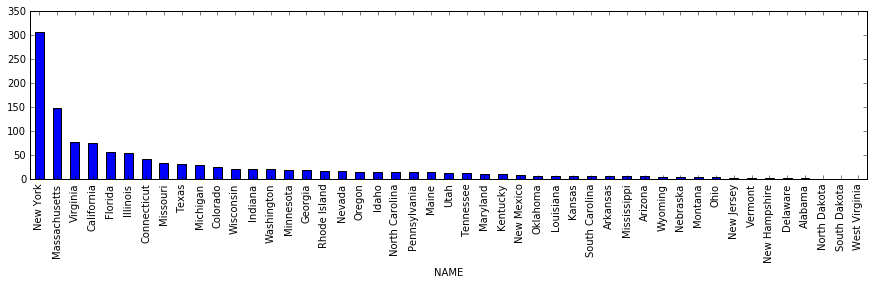

In [47]:
geo_mergeT.set_index("NAME")["TOTAL_TRUMP"].sort_values(ascending = False).plot(kind = "bar", figsize = (15, 3))

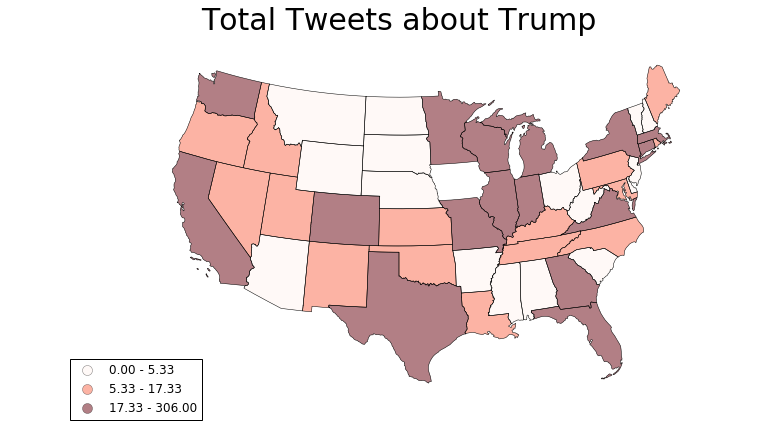

In [58]:
ft = "TOTAL_TRUMP"

albers = geo_mergeT.to_crs(epsg=2163)
ax = albers.plot(column = ft, scheme = "quantiles", k = 3, cmap = "Reds", legend = True,
                 alpha = 0.5, linewidth = 0.5, figsize = (12, 8))

ax.set_title("Total Tweets about Trump", fontsize = 30)
ax.set_axis_off()
ax.get_figure().savefig('Trump.png')

In [45]:
newshillary_df = pd.read_csv("hillary_tweets.csv", index_col = "NAME")
newshillary_df.head()


,NEWSPAPER,TWITTER_USER,11/22/16,11/23/16,11/24/16,11/25/16,11/26/16,TOTAL_HILLARY
NAME,,,,,,,,
Alabama,The Dothan Eagle,dothaneagle,0,0,0,0,0,0
Arizona,Arizona Daily Star,TucsonStar,0,0,0,0,3,3
Arkansas,Southwest Times Record,TimesRecord,0,0,0,0,0,0
California,San Francisco Chronicle,sfchronicle,0,0,0,0,3,3
Colorado,The Gazette,csgazette,1,0,1,0,1,3


In [50]:
geo_mergeH = geo_df.join(newshillary_df, how = "inner")
geo_mergeH.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,NEWSPAPER,TWITTER_USER,11/22/16,11/23/16,11/24/16,11/25/16,11/26/16,TOTAL_HILLARY
NAME,,,,,,,,,,,,,,,,,,
Alabama,0400000US01,131173369432,4593984687,01,00,Alabama,01,01779775,AL,"POLYGON ((-88.46866248405129 31.8938557116156,...",The Dothan Eagle,dothaneagle,0,0,0,0,0,0
Arizona,0400000US04,294204474990,1027559124,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona Daily Star,TucsonStar,0,0,0,0,3,3
Arkansas,0400000US05,134769279101,2962525273,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.617919 36.499414, -94.3612029999...",Southwest Times Record,TimesRecord,0,0,0,0,0,0
California,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA,"(POLYGON ((-118.593969 33.467198, -118.484785 ...",San Francisco Chronicle,sfchronicle,0,0,0,0,3,3
Colorado,0400000US08,268428431772,1175462574,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.059962 38.499987, -109.05996197...",The Gazette,csgazette,1,0,1,0,1,3


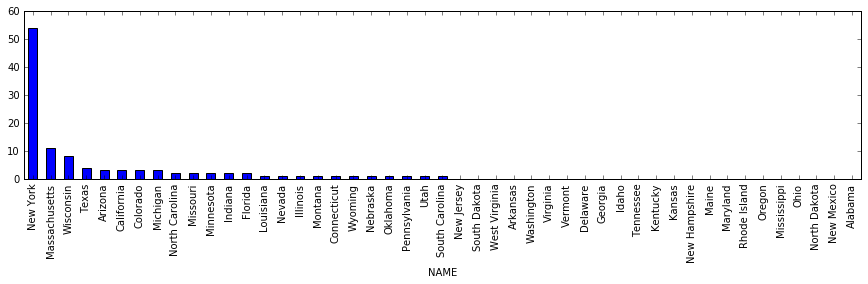

In [51]:
geo_mergeH.set_index("NAME")["TOTAL_HILLARY"].sort_values(ascending = False).plot(kind = "bar", figsize = (15, 3))

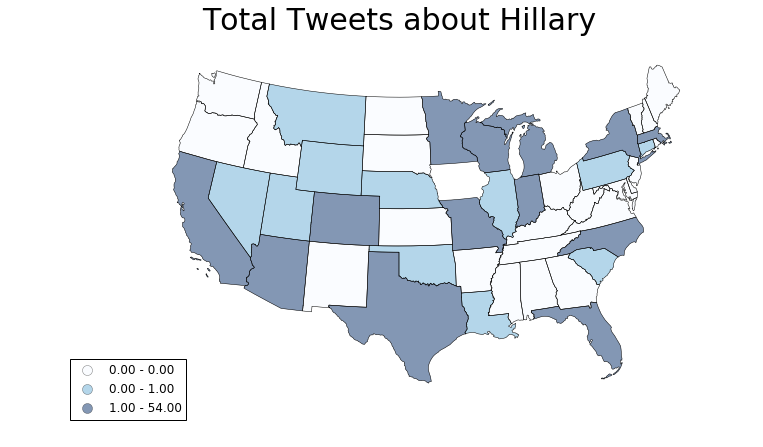

In [59]:
ft = "TOTAL_HILLARY"

albers = geo_mergeH.to_crs(epsg=2163)
ax = albers.plot(column = ft, scheme = "quantiles", k = 3, cmap = "Blues", legend = True,
                 alpha = 0.5, linewidth = 0.5, figsize = (12, 8))

ax.set_title("Total Tweets about Hillary", fontsize = 30)
ax.set_axis_off()
ax.get_figure().savefig('Hillary.png')